Model: MultinomialNB
Accuracy: 0.5
Classification Report:
               precision    recall  f1-score   support

    negative       0.50      1.00      0.67         1
    positive       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



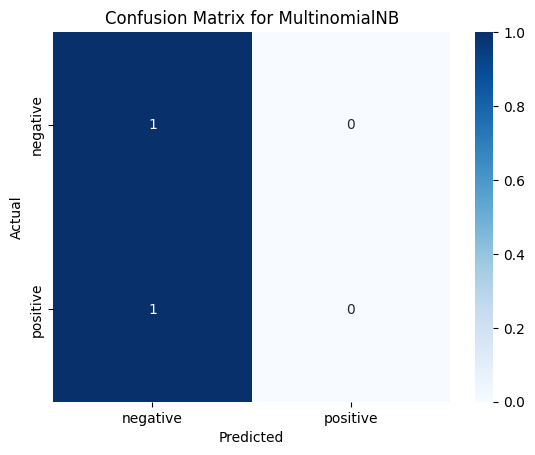

Model: LogisticRegression
Accuracy: 0.5
Classification Report:
               precision    recall  f1-score   support

    negative       0.00      0.00      0.00         1
    positive       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



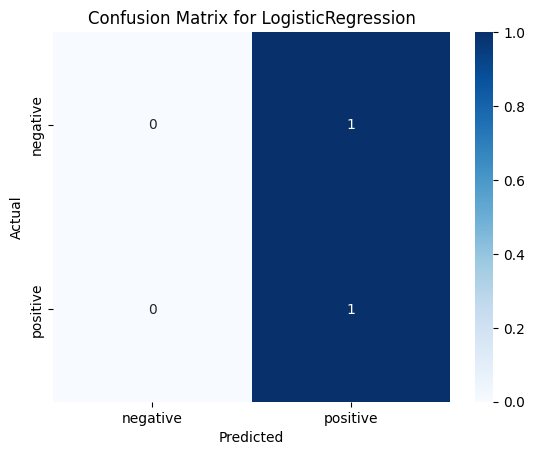

Model: RandomForest
Accuracy: 0.5
Classification Report:
               precision    recall  f1-score   support

    negative       0.50      1.00      0.67         1
    positive       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



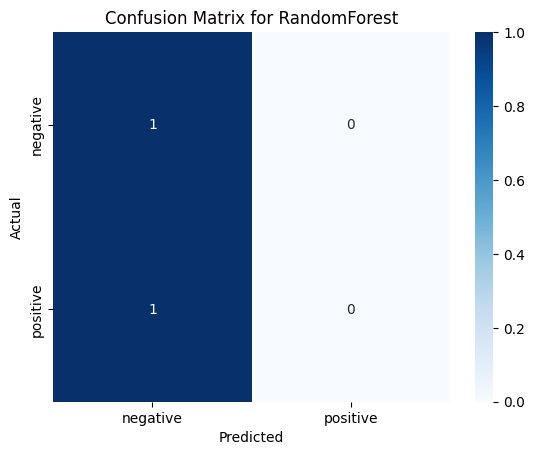

In [ ]:
# Step 1: Install Required Libraries
# !pip install pandas scikit-learn nltk matplotlib seaborn imbalanced-learn

# Step 2: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import nltk
from nltk.corpus import stopwords
import seaborn as sns
import matplotlib.pyplot as plt

# Download stopwords if not already downloaded
try:
    _ = stopwords.words('english')
except LookupError:
    nltk.download('stopwords')

# Step 3: Prepare Sample Educational Data
data = {
    'Review': [
        "The education system is great and very effective!",
        "I feel the curriculum is outdated and boring.",
        "Teachers are supportive and dedicated.",
        "The workload is overwhelming and stressful.",
        "Overall, I love the opportunities provided by the school.",
        "This system needs serious improvements.",
        "The online classes were very interactive and engaging.",
        "Too much homework is given for minimal learning.",
        "Support from faculty is lacking.",
        "I found the course content to be very helpful."
    ],
    'Sentiment': ['positive', 'negative', 'positive', 'negative', 'positive',
                  'negative', 'positive', 'negative', 'negative', 'positive']
}

df = pd.DataFrame(data)

# Step 4: Preprocess the Data
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    text = text.lower()
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

df['Processed_Review'] = df['Review'].apply(preprocess_text)

# Step 5: Feature Extraction using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Processed_Review'])
y = df['Sentiment']

# Step 6: Handling Imbalanced Data
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Step 7: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)

# Step 8: Train Multiple Machine Learning Models with Hyperparameter Tuning

# Define models and hyperparameters
models = {
    'MultinomialNB': (MultinomialNB(), {'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]}),
    'LogisticRegression': (LogisticRegression(max_iter=1000), {'C': [0.1, 1, 10, 100]}),
    'RandomForest': (RandomForestClassifier(), {'n_estimators': [10, 50, 100]})
}

best_estimators = {}

for model_name, (model, params) in models.items():
    grid_search = GridSearchCV(model, params, cv=3)
    grid_search.fit(X_train, y_train)
    best_estimators[model_name] = grid_search.best_estimator_

# Step 9: Evaluate Models
for model_name, model in best_estimators.items():
    y_pred = model.predict(X_test)
    print(f"Model: {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['negative', 'positive'], 
                yticklabels=['negative', 'positive'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()
